# What resolution do we need to measure P(vparallel| rparallel, rperp) ? 

Test tpcf(sperp, spar) to tpcf(s, mu) mapping and accuracy on multipoles (or wedges)


In [ ]:
from halotools.mock_observables import rp_pi_tpcf, tpcf, s_mu_tpcf, tpcf_multipole
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import pickle
from CentralStreamingModel.utils.read_probabilities import VD_los
from CentralStreamingModel.integral.real2redshift import compute_integrand, integrate
import tpcf_tools as tt
import seaborn as sns
sns.set_context('talk')

In [ ]:
box = 1
data_dir = f'/raid/nbody/baorsd/run{100 + box:03d}/halo_catalog/'
boxsize = 2000. # Mpc/h 
snapshot = 11 # Redshift approx 0.5
if box == 15: 
    filename_root = f'R115_S{snapshot:03d}'

else:
    filename_root = f'S{snapshot:03d}_cen_rockstar'

print(f'Computing first stage for simulation @ {data_dir + filename_root}')

n_threads = 16  

m200c = np.fromfile(data_dir + filename_root + '_mass.bin', dtype = np.float32)

# i) Measure minimum halo mass given target number density

target_number_density = 3.e-4

n_objects = int(target_number_density * boxsize**3)
m_halo_min = np.sort(m200c)[-n_objects]



In [7]:
resolutions = [1., 0.5]
tp_dictionaries = []
for res in resolutions:
    r_bins = np.arange(0., 50., res)
    r_bins[0] = 0.0001
    n_mu_bins = 60
    mu_bins = np.linspace(0.,1.,n_mu_bins)
    

    tpcf_dict = tt.compute_redshift_tpcf(data_dir + filename_root,
                box, snapshot,
                r_bins, mu_bins, m_halo_min, save = False)
    tp_dictionaries.append(tpcf_dict)

0.007099754502652819
0.007099754502652819


In [ ]:
for i, dictionary in enumerate(tp_dictionaries):
    plt.plot(dictionary['r'], 
    dictionary['r']*dictionary['r']*dictionary['mono'],
             label = f'$\Delta r$ = {resolutions[i]}', linestyle='',
             marker='o', markersize=2)
plt.legend()

In [ ]:
for i, dictionary in enumerate(tp_dictionaries):
    plt.plot(dictionary['r'], 
    dictionary['r']*dictionary['r']*dictionary['quad'],
             label = f'$\Delta r$ = {resolutions[i]}', linestyle='',
             marker='o', markersize=2)
plt.legend()

In [ ]:
for i, dictionary in enumerate(tp_dictionaries):
    plt.plot(dictionary['r'], 
    dictionary['r']*dictionary['r']*dictionary['hexa'],
             label = f'$\Delta r$ = {resolutions[i]}', linestyle='',
             marker='o', markersize=2)
plt.legend()

In [15]:
list_n_bins = [30, 60, 120]
tp_dictionaries = []
for n_mu_bins in list_n_bins:
    r_bins = np.arange(0., 50., 1.)
    r_bins[0] = 0.0001
    mu_bins = np.linspace(0.,1.,n_mu_bins)
    

    tpcf_dict = tt.compute_redshift_tpcf(data_dir + filename_root,
                box, snapshot,
                r_bins, mu_bins, m_halo_min, save = False)
    tp_dictionaries.append(tpcf_dict)

0.007099754502652819
0.007099754502652819
0.007099754502652819


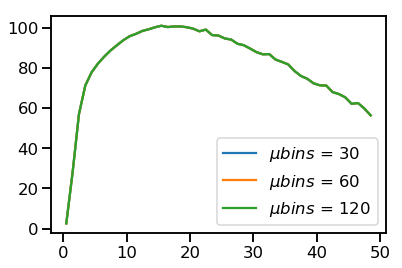

In [16]:
for i, dictionary in enumerate(tp_dictionaries):
    plt.plot(dictionary['r'], 
    dictionary['r']*dictionary['r']*dictionary['mono'],
             label = f'$\mu bins$ = {list_n_bins[i]}')
plt.legend()

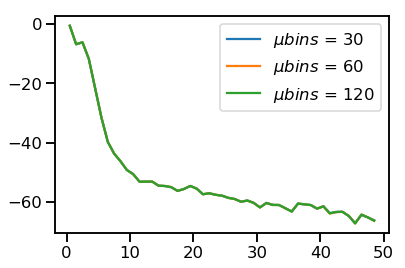

In [17]:
for i, dictionary in enumerate(tp_dictionaries):
    plt.plot(dictionary['r'], 
    dictionary['r']*dictionary['r']*dictionary['quad'],
             label = f'$\mu bins$ = {list_n_bins[i]}')
plt.legend()

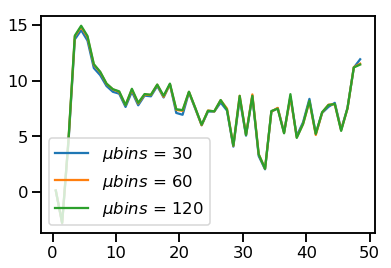

In [18]:
for i, dictionary in enumerate(tp_dictionaries):
    plt.plot(dictionary['r'], 
    dictionary['r']*dictionary['r']*dictionary['hexa'],
             label = f'$\mu bins$ = {list_n_bins[i]}')
plt.legend()